In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

sns.set_style("darkgrid")
font={'size': 12}
matplotlib.rc('font', **font)

In [3]:
from tqdm import tqdm

In [4]:
tqdm.pandas()

In [5]:
#d_a  = pd.read_csv('data_by_artist.csv')
#d_g  = pd.read_csv('data_by_genres.csv')
#d_y  = pd.read_csv('data_by_year.csv')
d_wg = pd.read_csv('data_w_genres.csv')
data = pd.read_csv('data.csv')

In [6]:
print(data.shape)

(174389, 19)


## Remove duplicates with same values for all columns and keep the first occurrence

In [7]:
pd.concat(g for _, g in data.groupby("id") if len(g) > 1)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
90451,0.02110,['The Sax Brothers'],0.802,427427,0.990,0,00AlyvtV1NIaDTBXtFpMza,0.675000,11,0.3740,-5.422,1,Back On Sax - South East Players Klubb Mix,0,2013-03-22,0.0633,139.007,0.110,2013
139909,0.02110,['The Sax Brothers'],0.802,427427,0.990,0,00AlyvtV1NIaDTBXtFpMza,0.675000,11,0.3740,-5.422,1,Back On Sax - South East Players Klubb Mix,0,2013-03-22,0.0633,139.007,0.110,2013
16699,0.82900,['Anthem Lights'],0.420,213165,0.281,0,00ohIpPn9LkKpeIqhfIU9V,0.000000,11,0.3760,-8.204,1,K-Love Fan Awards: Songs of the Year (2014 Mas...,28,2014-03-04,0.0334,119.515,0.229,2014
17915,0.82900,['Anthem Lights'],0.420,213165,0.281,0,00ohIpPn9LkKpeIqhfIU9V,0.000000,11,0.3760,-8.204,1,K-Love Fan Awards: Songs of the Year (2014 Mas...,28,2014-03-04,0.0334,119.515,0.229,2014
18081,0.82900,['Anthem Lights'],0.420,213165,0.281,0,00ohIpPn9LkKpeIqhfIU9V,0.000000,11,0.3760,-8.204,1,K-Love Fan Awards: Songs of the Year (2014 Mas...,28,2014-03-04,0.0334,119.515,0.229,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170110,0.00240,['Chris Mills'],0.510,186187,0.706,0,7zco3r8bvuw5Hs36SDwpgK,0.000538,6,0.1060,-5.990,1,All You Ever Do,0,2010,0.0322,135.321,0.495,2010
157030,0.00989,"['Boogie Pimps', 'Dan Lemur']",0.825,376875,0.526,0,7zdy4EDovNGJmSSfKYdYx9,0.369000,9,0.0764,-6.355,0,24Seven - Dan Lemur Progressive Remix,0,2013-01-14,0.0400,127.996,0.679,2013
157096,0.00989,"['Boogie Pimps', 'Dan Lemur']",0.825,376875,0.526,0,7zdy4EDovNGJmSSfKYdYx9,0.369000,9,0.0764,-6.355,0,24Seven - Dan Lemur Progressive Remix,0,2013-01-14,0.0400,127.996,0.679,2013
16201,0.00501,['Valeesse'],0.896,247277,0.759,0,7zmNLvvrBAVa8tEcTQCe8q,0.581000,10,0.0977,-6.945,0,Psychopath,0,2021-01-15,0.0804,126.009,0.210,2021


In [8]:
data = data.drop_duplicates(keep='first')
print(data.shape)

(172230, 19)


## Remove duplicates with same values for all columns except 'id' and keep the first occurrence

In [9]:
data = data.drop_duplicates(subset=['acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year'], keep="first")
print(data.shape)

(171226, 19)


## Sort by 'release_date', then remove duplicates with same values for 'artists' and 'name' and keep the first occurrence

In [10]:
data = data.sort_values(['release_date']).drop_duplicates(subset=['artists', 'name'], keep="first")
print(data.shape)

(159441, 19)


In [11]:
data = data.reset_index(drop=True)

## Data with genre

In [12]:
print(d_wg.shape)
d_wg.head().artists[0]

(32539, 16)


'"Cats" 1981 Original London Cast'

In [13]:
# could also just pass eval
eval_func = lambda x : eval(x)

In [14]:
d_wg['genres'] = d_wg.genres.progress_apply(eval)

100%|██████████| 32539/32539 [00:00<00:00, 125687.78it/s]


In [15]:
print(d_wg['genres'].apply(lambda x: len(x) == 0).sum())
d_wg['genres'].apply(lambda x: len(x) == 0 and isinstance(x, list)).sum()

13563


13563

## General data - song level

In [16]:
print(data.shape)
data.head()

(159441, 19)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.986,['Dick Haymes'],0.208,182227,0.234,0,5DihlLenQJhJXGJhbtiTrM,0.656000,8,0.2340,-15.427,1,Till the End of Time,0,1920,0.0426,85.288,0.2090,1920
2,0.994,['Dick Haymes'],0.392,165253,0.128,0,5EwQxd2XGjp1BUZT2iHhEj,0.153000,2,0.0983,-15.220,1,You'll Never Know,0,1920,0.0378,126.728,0.2260,1920
3,0.992,['Dick Haymes'],0.344,171160,0.196,0,5LnfrTxUQwINaVUIqaNmXa,0.004410,0,0.1570,-13.969,1,A Chapter in My Life Called Mary,0,1920,0.0365,79.837,0.3540,1920
4,0.891,"['ST', '98', 'R2S', 'Niklas O']",0.410,181969,0.296,1,5RgQ7t5uimI5St2H3CV9pb,0.000005,0,0.0910,-13.879,0,Moyenne d'âge,0,1920,0.0386,127.946,0.0625,1920


In [17]:
data['artists'] = data.artists.apply(eval)

## Group data by decade

In [18]:
data['decade'] = (data['year'] // 10) *10

In [19]:
decade_count_df = data.groupby(data['decade'], as_index=False).size()

print(decade_count_df)

    decade   size
0     1920   5212
1     1930  10225
2     1940  14412
3     1950  18847
4     1960  18235
5     1970  18511
6     1980  18495
7     1990  18662
8     2000  12396
9     2010  20136
10    2020   4310


### Distribution of songs by decade

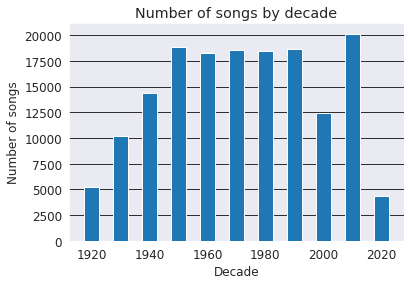

In [20]:
decade_count_df = data.groupby(data['decade']).size()

sz = np.array(decade_count_df.index.values)
ht = decade_count_df.to_numpy()

plt.bar(sz, ht, width=5)
plt.title("Number of songs by decade")
plt.xlabel("Decade")
plt.ylabel("Number of songs")
plt.grid(b=True, axis='y', color='black')
plt.grid(b=False, axis='x')




plt.show()

### Trend of selected features by decade

In [21]:
acousticness_decade_df = data[['decade', 'acousticness']]
acousticness_decade_df = acousticness_decade_df.groupby(['decade']).mean()
acousticness_decade_df.reset_index(drop=True)

energy_decade_df = data[['decade', 'energy']]
energy_decade_df = energy_decade_df.groupby(['decade']).mean()

loudness_decade_df = data[['decade', 'loudness']]
loudness_decade_df = loudness_decade_df.groupby(['decade']).mean()

tempo_decade_df = data[['decade', 'tempo']]
tempo_decade_df = tempo_decade_df.groupby(['decade']).mean()

print(acousticness_decade_df)

        acousticness
decade              
1920        0.778190
1930        0.812454
1940        0.868264
1950        0.837177
1960        0.630502
1970        0.405500
1980        0.308809
1990        0.317008
2000        0.271336
2010        0.231360
2020        0.232980


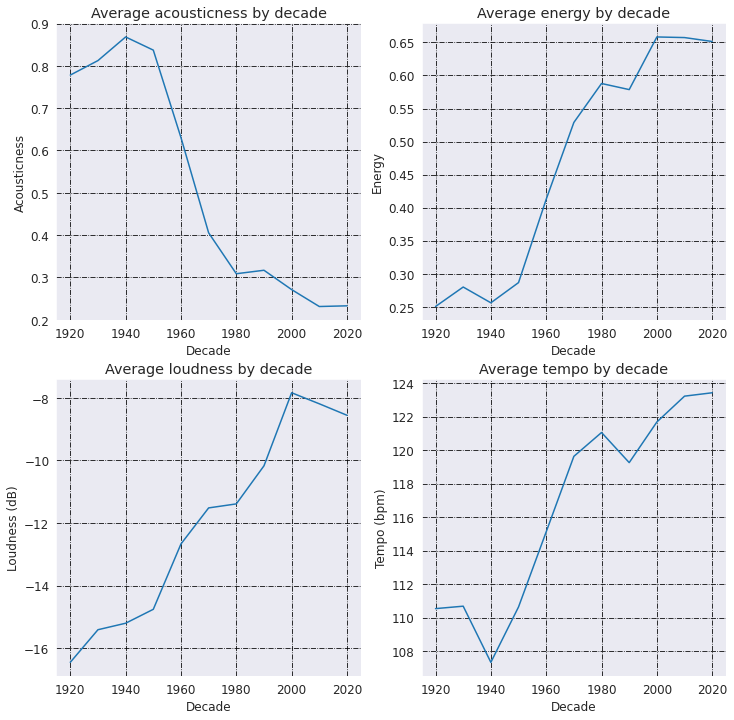

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))


ax[0][0].plot(acousticness_decade_df['acousticness'], label='Acousticness')
ax[0][0].set_xlabel('Decade')
ax[0][0].set_ylabel('Acousticness')
ax[0][0].set_title("Average acousticness by decade")
ax[0][0].grid(b=True, linestyle='-.', color='black')

ax[0][1].plot(energy_decade_df['energy'], label='Energy')
ax[0][1].set_xlabel('Decade')
ax[0][1].set_ylabel('Energy')
ax[0][1].set_title("Average energy by decade")
ax[0][1].grid(b=True, linestyle='-.', color='black')


ax[1][0].plot(loudness_decade_df['loudness'])
ax[1][0].set_xlabel('Decade')
ax[1][0].set_ylabel('Loudness (dB)')
ax[1][0].set_title("Average loudness by decade")
ax[1][0].grid(b=True, linestyle='-.', color='black')


ax[1][1].plot(tempo_decade_df['tempo'])
ax[1][1].set_xlabel('Decade')
ax[1][1].set_ylabel('Tempo (bpm)')
ax[1][1].set_title("Average tempo by decade")
ax[1][1].grid(b=True, linestyle='-.', color='black')

### Diving into acousticness, energy and loudness

In [23]:
decade_data = data.drop('year', axis=1)

<AxesSubplot:xlabel='acousticness', ylabel='loudness'>

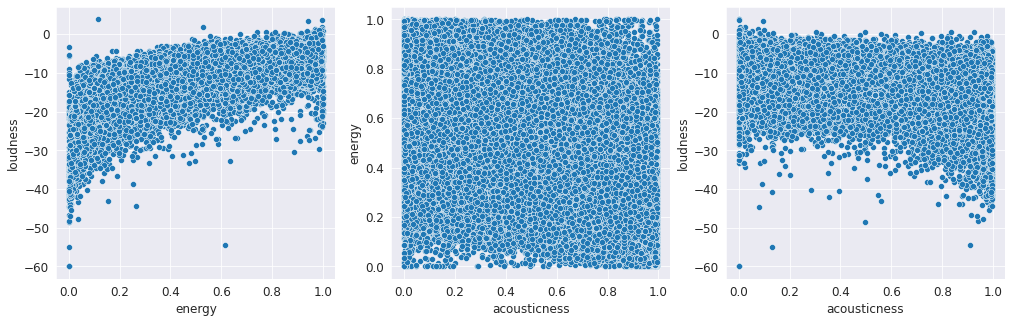

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))

sns.scatterplot(ax=ax[0], data=decade_data, x="energy", y="loudness")
sns.scatterplot(ax=ax[1], data=decade_data, x="acousticness", y="energy")
sns.scatterplot(ax=ax[2], data=decade_data, x="acousticness", y="loudness")

<AxesSubplot:xlabel='valence', ylabel='Density'>

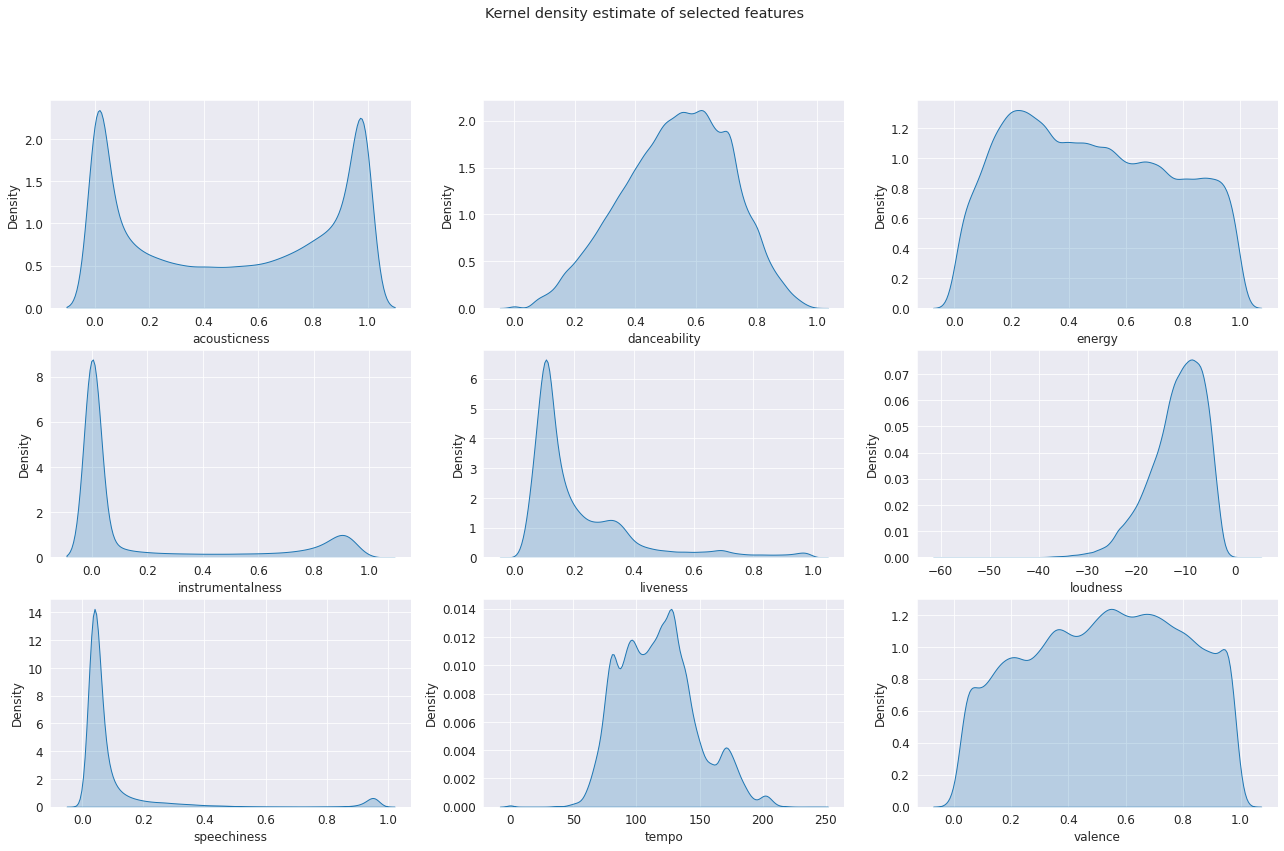

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(22, 13))

fig.suptitle("Kernel density estimate of selected features")
sns.kdeplot(ax=ax[0, 0], data=decade_data['acousticness'], shade=True)
sns.kdeplot(ax=ax[0, 1], data=decade_data['danceability'], shade=True)
sns.kdeplot(ax=ax[0, 2], data=decade_data['energy'], shade=True)
sns.kdeplot(ax=ax[1, 0], data=decade_data['instrumentalness'], shade=True)
sns.kdeplot(ax=ax[1, 1], data=decade_data['liveness'], shade=True)
sns.kdeplot(ax=ax[1, 2], data=decade_data['loudness'], shade=True)
sns.kdeplot(ax=ax[2, 0], data=decade_data['speechiness'], shade=True)
sns.kdeplot(ax=ax[2, 1], data=decade_data['tempo'], shade=True)
sns.kdeplot(ax=ax[2, 2], data=decade_data['valence'], shade=True)

## Cleaning and merging genre data

In [24]:
len(set(d_wg.loc[d_wg.genres.apply(bool)].artists.tolist()))

18976

In [25]:
useful_artists = d_wg.loc[d_wg.genres.progress_apply(lambda x: bool(x))].artists.tolist()
len(useful_artists)

100%|██████████| 32539/32539 [00:00<00:00, 819114.84it/s]


18976

In [26]:
%%time
# test = data.iloc[:]
useful_data = data.loc[data.artists.progress_apply(lambda x: bool(set(list(x)).intersection(set(useful_artists))))]
# other_data  = data.loc[data.artists.progress_apply(lambda x:  not bool(set(x).intersection(set(useful_artists))))]

other_data  = data.loc[[True if i not in useful_data.index else False for i in range(data.shape[0])]]

 10%|█         | 16269/159441 [00:09<01:24, 1693.94it/s]


KeyboardInterrupt: 

In [27]:
print(useful_data.shape)
print(other_data.shape)

NameError: name 'useful_data' is not defined

In [ ]:
useful_data = useful_data.reset_index(drop=True)
other_data  = other_data.reset_index(drop=True)

In [ ]:
import itertools

In [ ]:
major_genre_set = set()

def get_genres(artists):
    global major_genre_set
    
    genre_set = set()
    temp = d_wg.loc[d_wg.artists.apply(lambda x: bool(set([x]).intersection(set(artists)))), 'genres'].tolist()
    temp  = list(itertools.chain(*temp))
#     print(temp)
    genre_set.update(temp)
    major_genre_set.update(temp)
    
    return list(genre_set)

check_list = ['"Cats" 1981 Original London Cast',]

In [ ]:
%%time
useful_data['genres'] = useful_data.artists.progress_apply(get_genres)

In [ ]:
useful_data.to_csv('useful_data1.csv', index=False)

In [ ]:
print(useful_data.shape)
print(useful_data.head)

In [ ]:
other_data.to_csv('other_data.csv', index=False)

In [ ]:
print(other_data.shape)
print(other_data.head)